## Modules & source data

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_style('white')

# Read the source data
source_data = 'product_sales.csv'
df = pd.read_csv(source_data)

## Data Validation

In [3]:
# Show first 5 rows
df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Summarize the data
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
# Show data types & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
# Validate the week column
df['week'].unique()

array([2, 6, 5, 4, 3, 1], dtype=int64)

In [7]:
# Validate the sales_method column
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [8]:
# Validate the customer_id column
len(df['customer_id'].unique())

15000

In [9]:
# Validate the revenue column
df['revenue'].isna().sum()

1074

In [10]:
# Validate the years_as_customer column
df['years_as_customer'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 47, 63], dtype=int64)

In [11]:
# Check the year range
year_founded = 1984
current_year = pd.Timestamp.now().year
date_validation = current_year - year_founded

df[df['years_as_customer'] > date_validation]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [12]:
# Validate the state column
df['state'].sort_values().unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

The dataset contains 15,000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week: 6 numeric values representing weeks without missing values, same as the description. No cleaning is needed.

- sales_method: 5 unique string values without missing values. Values _em + call_ and _email_ needs replacing with _Email + Call_ and _Email_ respectively.

- customer_id : string values without missing values, same as the description. No cleaning is needed.

- nb_sold: numeric values without missing values, same as the description. No cleaning is needed.

- revenue: numeric values with 1,074 missing values. Missing values will be imputed with median values for each sales method. 

- years_as_customer: numeric values without missing values, same as the description. However, there are 2 customers with values that exceeds the possible year range. All in all, there is little point of replacing or removing the 2 rows as this variable is not crucial for the purpose of this analysis. No cleaning is needed.

- nb_site_visits: numeric values without missing values, same as the description. No cleaning is needed.

- state: string values without missing values, same as the description. No cleaning is needed.

## Data Cleaning

In [13]:
# Create a dictionary with correct values
rename_methods = {'em + call' : 'Email + Call', 'email' : 'Email'}

# Replace the wrong methods
df['sales_method'] = df['sales_method'].replace(rename_methods)

# Calculate median values for each sales method and store in a dictionary
medians = df.groupby('sales_method')['revenue'].median().to_dict()

# Impute missing values with the median value for their respective sales method
df['revenue'] = df.apply(lambda row: medians[row['sales_method']] if pd.isnull(row['revenue']) else row['revenue'], axis=1)

## Key Questions

### How many customers were there for each approach?

Out of a total of 15,000 customers, our company has engaged with them through various sales methods. The bar chart below reveals that the **email** sales method was employed to contact **7,466** customers, making it the most widely utilized approach. 
Additionally, a significant number of customers, specifically 4,962, were reached through a call-only approach. In contrast, the combination of **email and call** was used to contact **2,572** customers.

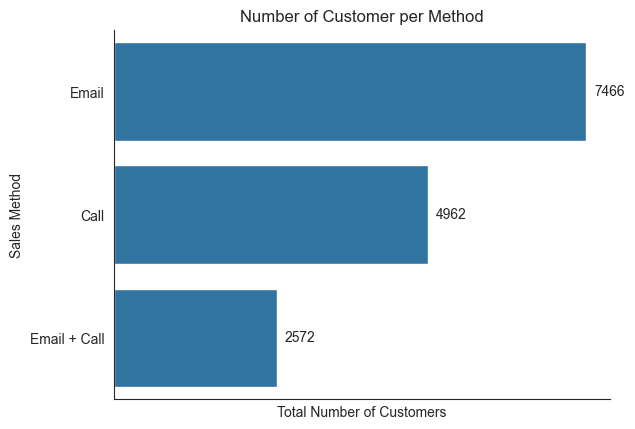

In [14]:
# Subset by sales_method and customer_id, group by sales_method
methods_customer = df[['sales_method', 'customer_id']].groupby(['sales_method']).count()\
                                                      .reset_index()\
                                                      .sort_values("customer_id", ascending=False)

# Create a horizontal bar plot
g = sns.barplot(data = methods_customer, x = 'customer_id', y = 'sales_method')
sns.despine()
g.set_title('Number of Customer per Method')
g.set_xlabel('Total Number of Customers')
g.set_ylabel('Sales Method')
g.bar_label(g.containers[0], padding = 6)
plt.xticks([])
plt.show()

In [15]:
methods_customer

,sales_method,customer_id
1,Email,7466
0,Call,4962
2,Email + Call,2572


### What does the spread of the revenue look like overall? And for each method?

Before we look at the revenue distribution, let's examine which method has been the most successful in terms of revenue. It is evident that the **email** method has been the standout performer, accounting for **over 50%** of the total revenue. This dominance is followed by the email + call and call methods, which contributed to the remaining revenue share.

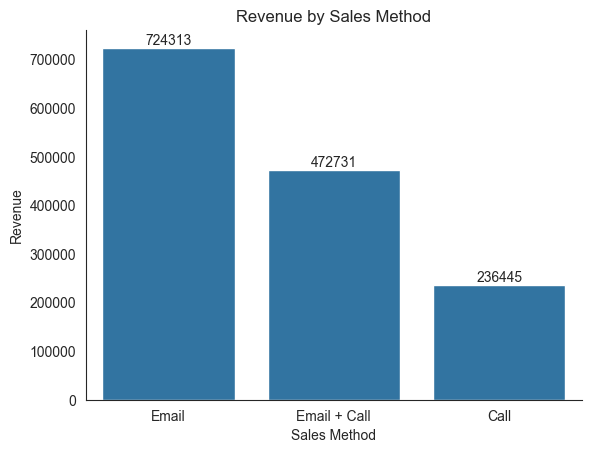

In [16]:
# Inspect which method generated the biggest revenue in total
revenue_method = df[['sales_method', 'revenue']].groupby(['sales_method']).sum()\
                               .sort_values("revenue", ascending=False).reset_index()

# Create a horizontal bar plot
g = sns.barplot(data = revenue_method, x = 'sales_method', y = 'revenue')
g.set_title('Revenue by Sales Method')
g.set_xlabel('Sales Method')
g.set_ylabel('Revenue')
g.bar_label(g.containers[0])
sns.despine()
plt.show()

Regarding the distribution of revenue throughout the dataset, the concentration of columns suggests that a significant portion of our revenue falls within lower revenue ranges. This distribution pattern implies that the most of our revenue that each customer generated are below 115 in this particular context.

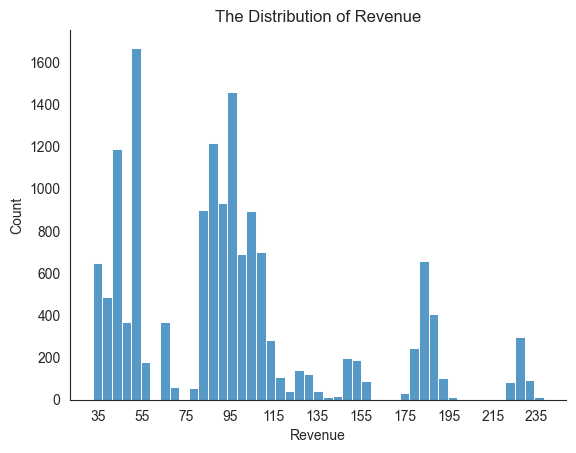

In [17]:
# Create a histogram of revenue
g = sns.histplot(data = df, x="revenue")

g.set_xlabel('Revenue')
g.set_ylabel('Count'),
g.set_title('The Distribution of Revenue')
plt.xticks(np.arange(35, 250, 20))
sns.despine()
plt.show()

Zooming in on the distribution of revenue by each sales method, we see a clear picture of the revenue distribution for each method. It indicates distinct ranges of revenue associated with each sales approach. Specifically, the **call** method generated revenue within the range of **35 to 70**, suggesting it's concentrated in the lower revenue spectrum. In contrast, the **email** method shows a revenue range of **80 to 125**, indicating a moderate but consistent performance. Finally, the **email + call** method exhibits the widest revenue range, spanning from **130 to 240**, which suggests that it has been the most successful in generating higher revenues compared to the other two methods.

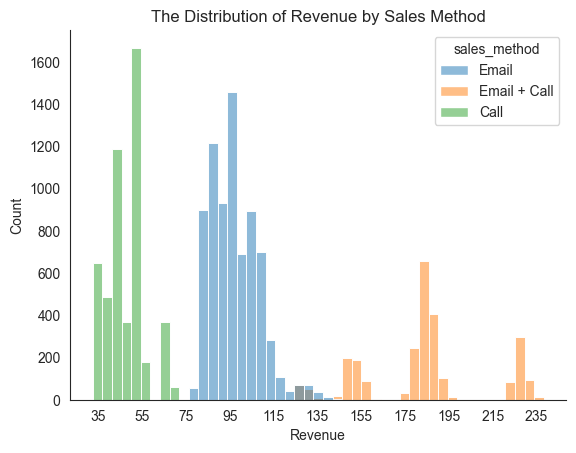

In [18]:
# Create a histogram of revenue by sales method
g = sns.histplot(data = df, x="revenue", hue = 'sales_method')

g.set_xlabel('Revenue')
g.set_ylabel('Count'),
g.set_title('The Distribution of Revenue by Sales Method')
plt.xticks(np.arange(35, 250, 20))
sns.despine()
plt.show()

### Was there any difference in revenue over time for each of the methods?

The line chart displaying revenue trends over time for each sales method provides valuable insights into their performance dynamics. For the email method, it started off strong but experienced a sharp decline in revenue over the first three weeks. A slight increase in the fourth week suggests that additional email communication had a modest impact, but it ended with the lowest revenue in the last week. In contrast, the call method exhibited a gradual, steady increase until the fifth week, followed by a significant drop. Lastly, the email + call method had a challenging start but managed to steadily increase revenue until week 5, with a slight dip in the last week.

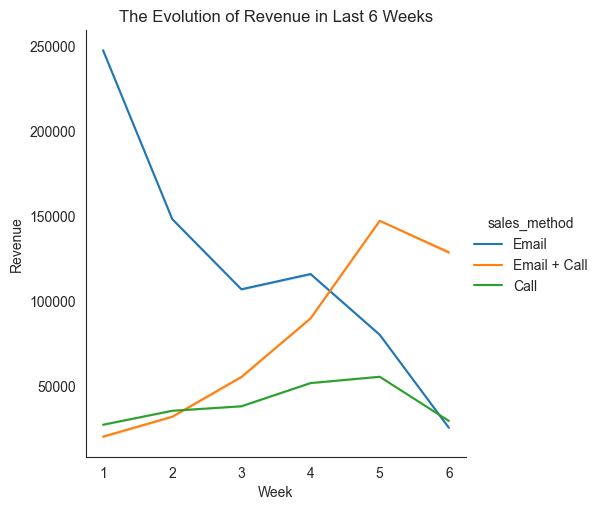

In [19]:
# Create a line chart of revenue by each sales method
g = sns.relplot(data = df,
                x = 'week',
                y = 'revenue',
                hue = 'sales_method',
                kind = 'line',
                estimator = 'sum')

g.set(xlabel = 'Week',
      ylabel = 'Revenue',
      title="The Evolution of Revenue in Last 6 Weeks")
      
plt.show()

### Additional insights
The number of visits shows a normal distribution. This distribution pattern suggests that our website traffic follows a typical bell-shaped curve, where the most common number of visits is near the mean. In practical terms, this indicates that our website's traffic distribution is relatively stable and follows a predictable pattern.

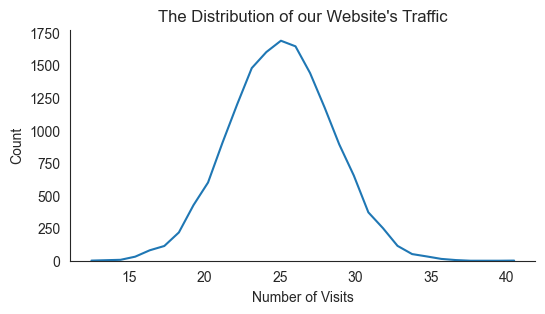

In [20]:
# Visualize the distribution of website's traffic
plt.figure(figsize=(6, 3))

g = sns.histplot(data = df, x="nb_site_visits", element="poly", fill=False, bins = 30)

g.set_xlabel('Number of Visits')
g.set_ylabel('Count'),
g.set_title("The Distribution of our Website's Traffic")
sns.despine()
plt.show()

Looking at the top 20 countries by revenue, we see that individual sales methods do not have a significant impact on how much revenue is generated in individual countries. 

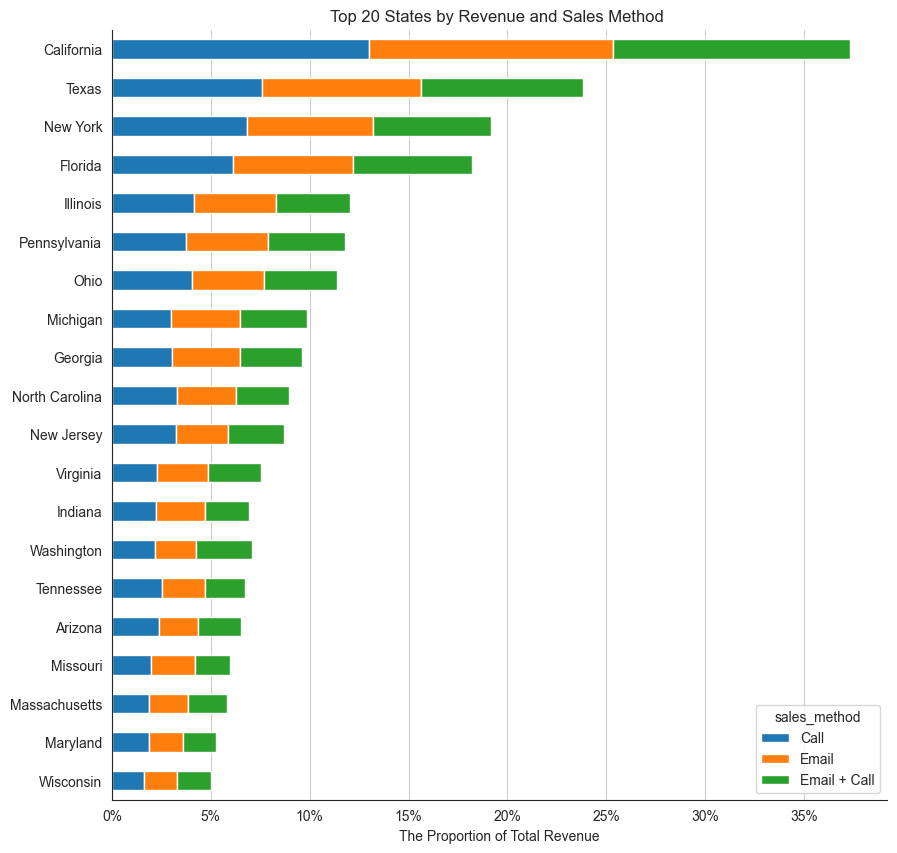

In [21]:
# Create a bar chart displaying top 20 states by revenue and each sales method
g = pd.crosstab(index = df.state,
                 columns = df.sales_method,
                 values = df.revenue,
                 aggfunc = 'sum',
                 margins = True,
                 normalize = 'columns').sort_values('All', ascending = False)\
                 .nlargest(20, 'All')\
                 .drop('All', axis = 1)\
                 .plot(kind='barh',
                       stacked=True,
                       title='Top 20 States by Revenue and Sales Method ',
                       figsize=(10, 10),
                       ylabel = '',
                       xlabel = 'The Proportion of Total Revenue')

g.invert_yaxis() 
g.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
g.grid(axis = 'x')
sns.despine()

## Business Metric

Since our goal is to make sure we are using best approaches to sell the new product effectively, I recommend we use **the percentage of revenue by sales method** as our metric. This metric will help us track and compare the revenue generated by each of the three sales methods individually. It provides a clear picture of which method is most effective in terms of revenue generation. 

Based on our last 6 week data, **more than half** of the company's revenue comes from the **email method**. The table below provides an overview of proportion of total revenue generated by each method.

| Method    | Revenue |
| --------  | ------- |
| Email     | 51%     |
| Email + Call | 33%     |
| Call      | 16%    |


## Recommendation

Based on the analysis, I recommend that our business focuses primarily on the email sales method for marketing our products. Several key findings support this recommendation:

- The email method has generated the highest revenue among the three sales methods we have examined. This indicates that it has been the most effective in driving income for our company.

- It is noteworthy that the email method is not only the most revenue-generating but also the most cost-effective, as it requires very little work for the team, and efficient in terms of time. This means we can quickly penetrate the market at a relatively low cost compared to other methods. The data underscores the email method's significant impact on our revenue generation, reinforcing the recommendation to prioritize this approach in our sales and marketing strategies. 

- The analysis revealed that the choice of sales method does not significantly impact revenue in individual states, indicating that we do not risk losing niche markets by predominantly using the email method. 

- The data highlights the importance of being proactive with our email marketing efforts. We should increase the frequency of email campaigns and maintain consistent communication with our customers. The observed decline in revenue over time suggests that staying engaged with our customers is crucial for sustaining revenue growth. I suggest we send an email every 2 weeks, not every 3 weeks. 

In conclusion, focusing on the email sales method while adopting a more proactive approach to email marketing is the key takeaway from our findings. This strategy leverages our most lucrative sales method, maintains cost-efficiency, and ensures we continue to capture market share effectively.

### Possible next steps in the future:
- Given that the email sales method generated the highest revenue, we should consider segmenting our email list for targeted messaging.

- While email was the most successful method, don't rely solely on it. Continue to use the email + call method to reach different customer segments. Analyze the data to understand which methods work best for specific products or customer demographics and adjust our strategy accordingly.

- Given the normal distribution of website visits, explore the factors contributing to the central value of this distribution. Invest in website analytics to understand user behavior, improve user experience, and enhance website content to retain and attract more visitors.

- Implement A/B testing for marketing campaigns to determine which specific strategies and messaging resonate most with our audience and drive higher conversion rates and revenue.